In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [0]:
from sklearn.linear_model import Ridge
from sklearn.datasets import fetch_california_housing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [12]:
data_california=fetch_california_housing()
print(data_california.DESCR)
X=data_california.data
Y=data_california.target
#print(X)
[print('(:f)',format(x))for x in X[505]]
print(Y)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [0]:
model=LinearRegression()
X_train=X_train[:,5] #Selecting first 5 features only
print(X_train)

[2.62093863 2.37704918 4.33195021 ... 3.33206831 3.17889088 2.10869565]


In [8]:
X_train=X_train.reshape(-1,1)#Reshape the dimension into a 339 X 1 vector
#Number of train samples = 67% of total samples = 67% of 20638 =  approx. 
#X_train=X_train.reshape(13827,1)
print(X_train)

[[2.62093863]
 [2.37704918]
 [4.33195021]
 ...
 [3.33206831]
 [3.17889088]
 [2.10869565]]


In [9]:
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
X_test=X_test[:,5]
X_test=X_test.reshape(-1,1)

In [0]:
Y_pred=model.predict(X_test)

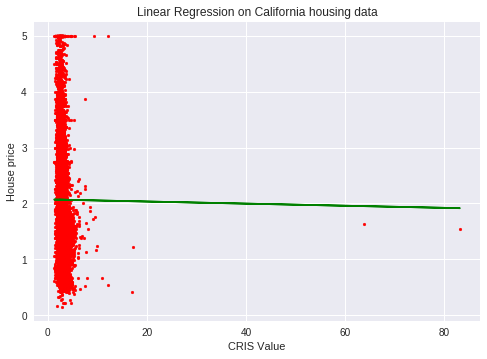

	Red dotes indicate the actual values in the test set
	Green line denotes the predicted regression line



In [13]:
#Put title
plt.title("Linear Regression on California housing data")
#Put label in x axis
plt.xlabel("CRIS Value")
#Put label in y axis
plt.ylabel("House price")
'''
Scatter the correct values with features in the test set
color:Color of the scatter points
s :Size of the scatter points
'''
plt.scatter(X_test,y_test,color = 'red',s=8)
'''
Plot the predicted values with features in the test set
Drawing the regression line
color : Color of the regression line
'''
plt.plot(X_test,Y_pred, color = 'green')
plt.show()
print('\tRed dotes indicate the actual values in the test set')
print('\tGreen line denotes the predicted regression line\n')


In [15]:
'''
calculate MAE
Mean Absolute Error (MAE): MAE measures the average magnitude of the errors
in a set of predictions, without considering their direction
'''
print("\tMean_absolute_error :",metrics.mean_absolute_error(y_test, Y_pred))

	Mean_absolute_error : 0.9122926843077764


In [16]:
'''
calculate MSE
Mean Squared Error (MSE) measures the average of the squares of the errors
'''
print("\tMean_squared_error :",metrics.mean_squared_error(y_test, Y_pred))

	Mean_squared_error : 1.3316880030067937


In [17]:
'''
calculate RMSE
Root mean squared error (RMSE): RMSE is a quadratic scoring rule
that measures the average
magnitude of the error.
It’s the square root of the average of squared differences between
prediction and actual observation
'''
print("\tRoot mean_squared_error :",np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

	Root mean_squared_error : 1.153987869523243


In [18]:
'''
R-squared is a statistical measure of how close the data are to the
fitted regression line
'''
print("\tR-squared measure :",metrics.r2_score(y_test, Y_pred))

	R-squared measure : 0.0006782363549892034


In [0]:
'''
Ridge regression
Initialize Ridge object
alpha : Indicates regularization strength
normalize : True/False. Which indicates the L2 normalization order
refer : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
'''
ridgeReg = Ridge(alpha=0.05, normalize=True)


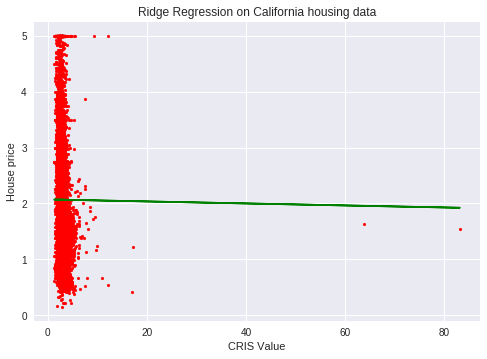

	Red dots indicate the actual values in the test set
	Green line denotes the predicted regression line

	Mean_absolute_error : 0.9123097559962039
	Mean_squared_error : 1.331732299690738
	Root mean_squared_error : 1.1540070622360756
	R-squared measure : 0.0006449953554286125


In [20]:
#Train the Ridge object using X_train and y_train
ridgeReg.fit(X_train,y_train)
Y_pred= ridgeReg.predict(X_test)
#Put title
plt.title("Ridge Regression on California housing data")
#Put label in x axis
plt.xlabel("CRIS Value")
#Put label in y axis
plt.ylabel("House price")
#Scatter the correct values with features in the test set
plt.scatter(X_test,y_test,color = 'red',s=8)
#Plot the predicted values with features in the test set
plt.plot(X_test,ridgeReg.predict(X_test), color = 'green')
plt.show()
print('\tRed dots indicate the actual values in the test set')
print('\tGreen line denotes the predicted regression line\n')
print("\tMean_absolute_error :",metrics.mean_absolute_error(y_test, Y_pred))
print("\tMean_squared_error :",metrics.mean_squared_error(y_test, Y_pred))
print("\tRoot mean_squared_error :",np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print("\tR-squared measure :",metrics.r2_score(y_test, Y_pred))